In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Ecommerce Customers')

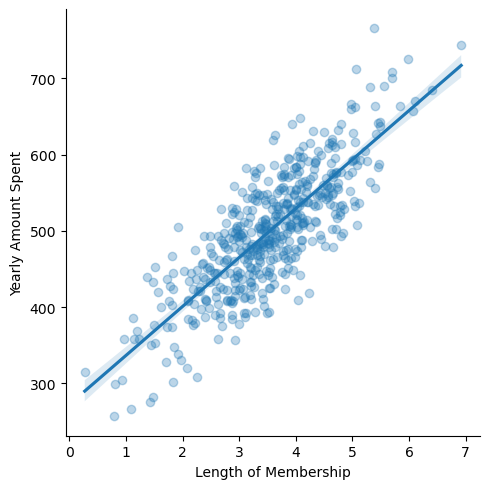

In [3]:
# length of membership vs yearly amount spent
sns.lmplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [6]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550


In [7]:
from sklearn.linear_model import LinearRegression


In [8]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [9]:
# Coefficient
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)
# r squared
lm.score(X, y)


                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


0.9842821675307221

In [10]:
#Predictions/testing model

##Predict the y-values based on x test values
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

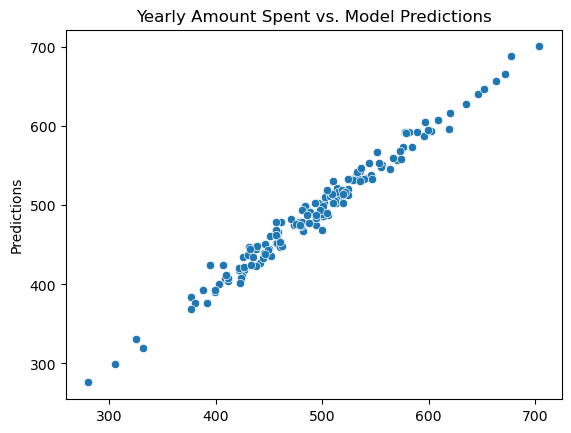

In [11]:
# Scatter plot of actual values of y vs predicted values. Should be nearly the same

sns.scatterplot(x=predictions, y=y_test)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

In [12]:
# Evaluation of the model 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432134
Mean Squared Error: 103.9155413650337
Root Mean Squared Error: 10.193897260863173


/var/folders/9g/v34g8lv55fl28x64t_hf8m000000gr/T/ipykernel_79207/339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

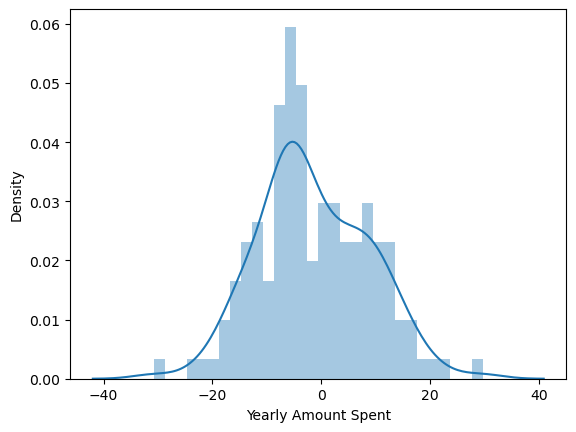

In [13]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

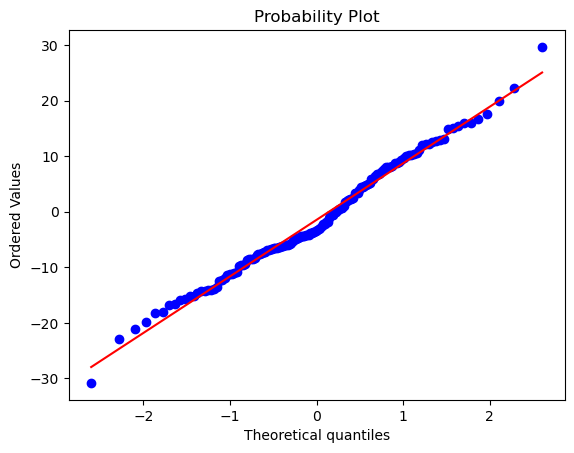

In [14]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()